# Construccion Teoria de Markowitz

In [27]:
#pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


### Lectura de ranking modelo SVR Xgboost

In [173]:
path_general='C:/Users/USUARIO/Downloads/lstm_with_pytorch_and_lightning_v1.0/lstm_with_pytorch_and_lightning/'

In [174]:
df_metrics_final = pd.read_csv(path_general + 'metricas_concatenadas_ranking_svr_xgb.csv', sep='|')

In [175]:
acciones_min_volatil=[
'PFCORFICOL',
'CELSIA',
'BVC',
'CORFICOLCF',
'CNEC',
'GRUPOAVAL',
'PFDAVVNDA',
'PFAVAL',
'NUTRESA',
'BOGOTA'
# 'ISA',
# 'PFCEMARGOS',
# 'EXITO',
# 'PFGRUPSURA',
# 'BCOLOMBIA'
]
len(acciones_min_volatil)

10

In [178]:
data_tesis=pd.read_excel('C:/Users/USUARIO/Downloads/lstm_with_pytorch_and_lightning_v1.0/lstm_with_pytorch_and_lightning/pronosticos/consolidado_pronosticos_xgb_1.xlsx')
print(data_tesis.shape)
data_tesis.head()

(1890, 2)


,nemotecnico,pronostico
0,BCOLOMBIA,-0.031886
1,BCOLOMBIA,-0.031453
2,BCOLOMBIA,-0.036252
3,BCOLOMBIA,-0.011974
4,BCOLOMBIA,-0.011589


In [179]:
data_tesis['nemotecnico'].value_counts()

BCOLOMBIA     90
GRUPOAVAL     90
PFGRUPOARG    90
PFDAVVNDA     90
PFCORFICOL    90
PFCEMARGOS    90
PFAVAL        90
NUTRESA       90
ISA           90
GRUPOSURA     90
GRUPOARGOS    90
BOGOTA        90
EXITO         90
ECOPETROL     90
CORFICOLCF    90
CNEC          90
CLH           90
CEMARGOS      90
CELSIA        90
BVC           90
PFGRUPSURA    90
Name: nemotecnico, dtype: int64

In [180]:
data_tesis['nemotecnico'].nunique()

21

In [182]:
data_tesis=data_tesis[data_tesis['nemotecnico'].isin(acciones_min_volatil)]

In [183]:
data_tesis.shape

(900, 2)

In [181]:
10*90

900

In [184]:
accion=list(data_tesis['nemotecnico'].unique())
accion

['BOGOTA',
 'BVC',
 'CELSIA',
 'CNEC',
 'CORFICOLCF',
 'GRUPOAVAL',
 'NUTRESA',
 'PFAVAL',
 'PFCORFICOL',
 'PFDAVVNDA']

In [185]:
dates = np.arange(np.datetime64('2022-10-01'), np.datetime64('2022-12-30'))
dates=pd.Series(dates)
dates=dates.astype(str)
len(dates)

90

In [186]:
dates_full=pd.concat([dates,dates,dates,dates,dates,
                     dates,dates,dates,dates,dates
])

In [187]:
dates_full

0     2022-10-01
1     2022-10-02
2     2022-10-03
3     2022-10-04
4     2022-10-05
         ...    
85    2022-12-25
86    2022-12-26
87    2022-12-27
88    2022-12-28
89    2022-12-29
Length: 900, dtype: object

In [188]:
dates_full=pd.DataFrame(dates_full)

In [189]:
dates_full.columns =['fecha']

In [190]:
dates_full

,fecha
0,2022-10-01
1,2022-10-02
2,2022-10-03
3,2022-10-04
4,2022-10-05
...,...
85,2022-12-25
86,2022-12-26
87,2022-12-27
88,2022-12-28


In [191]:
data_tesis.shape

(900, 2)

In [192]:
dates_full.shape

(900, 1)

In [193]:
data_tesis.head()

,nemotecnico,pronostico
90,BOGOTA,0.013844
91,BOGOTA,0.010134
92,BOGOTA,0.033192
93,BOGOTA,0.015560
94,BOGOTA,0.026393


In [194]:
data_tesis=pd.DataFrame(data_tesis)
dates_full=pd.DataFrame(dates_full)

In [195]:
data_tesis_vf=pd.concat([data_tesis, dates_full.set_index(data_tesis.index)], axis=1)
data_tesis_vf

,nemotecnico,pronostico,fecha
90,BOGOTA,0.013844,2022-10-01
91,BOGOTA,0.010134,2022-10-02
92,BOGOTA,0.033192,2022-10-03
93,BOGOTA,0.015560,2022-10-04
94,BOGOTA,0.026393,2022-10-05
...,...,...,...
1705,PFDAVVNDA,0.013565,2022-12-25
1706,PFDAVVNDA,0.012685,2022-12-26
1707,PFDAVVNDA,0.013144,2022-12-27
1708,PFDAVVNDA,0.014210,2022-12-28


In [196]:
data_tesis_vf_v1 = data_tesis_vf.pivot_table('pronostico', ['fecha'], 'nemotecnico')
data_tesis_vf_v1

nemotecnico,BOGOTA,BVC,CELSIA,CNEC,CORFICOLCF,GRUPOAVAL,NUTRESA,PFAVAL,PFCORFICOL,PFDAVVNDA
fecha,,,,,,,,,,
2022-10-01,0.013844,-0.003883,-0.006585,0.016962,-0.001742,-0.004283,-0.034344,-0.021617,0.003252,0.013919
2022-10-02,0.010134,0.000267,-0.013727,-0.018791,0.021162,-0.004572,-0.034732,0.002080,0.012380,0.001022
2022-10-03,0.033192,-0.003752,-0.013171,-0.020102,0.006746,-0.006920,-0.034794,0.023449,-0.004663,0.022692
2022-10-04,0.015560,0.000940,-0.003484,-0.003932,0.020753,-0.010337,-0.034140,-0.023491,-0.007908,0.013622
2022-10-05,0.026393,-0.000518,-0.017237,-0.012479,0.016347,-0.004398,-0.032856,0.024573,-0.004784,0.010572
...,...,...,...,...,...,...,...,...,...,...
2022-12-25,0.027737,-0.014693,-0.009869,-0.010251,0.008751,-0.005412,-0.033881,0.007500,0.009520,0.013565
2022-12-26,0.025979,-0.006443,-0.011332,-0.014396,0.007045,-0.009384,-0.033881,0.007229,0.005348,0.012685
2022-12-27,0.029117,-0.011271,-0.011380,-0.013385,0.006811,-0.013814,-0.033881,0.007171,0.003383,0.013144


In [197]:
data_tesis_vf_v1.index.name = None

In [198]:
data_tesis_vf_v1

nemotecnico,BOGOTA,BVC,CELSIA,CNEC,CORFICOLCF,GRUPOAVAL,NUTRESA,PFAVAL,PFCORFICOL,PFDAVVNDA
2022-10-01,0.013844,-0.003883,-0.006585,0.016962,-0.001742,-0.004283,-0.034344,-0.021617,0.003252,0.013919
2022-10-02,0.010134,0.000267,-0.013727,-0.018791,0.021162,-0.004572,-0.034732,0.002080,0.012380,0.001022
2022-10-03,0.033192,-0.003752,-0.013171,-0.020102,0.006746,-0.006920,-0.034794,0.023449,-0.004663,0.022692
2022-10-04,0.015560,0.000940,-0.003484,-0.003932,0.020753,-0.010337,-0.034140,-0.023491,-0.007908,0.013622
2022-10-05,0.026393,-0.000518,-0.017237,-0.012479,0.016347,-0.004398,-0.032856,0.024573,-0.004784,0.010572
...,...,...,...,...,...,...,...,...,...,...
2022-12-25,0.027737,-0.014693,-0.009869,-0.010251,0.008751,-0.005412,-0.033881,0.007500,0.009520,0.013565
2022-12-26,0.025979,-0.006443,-0.011332,-0.014396,0.007045,-0.009384,-0.033881,0.007229,0.005348,0.012685
2022-12-27,0.029117,-0.011271,-0.011380,-0.013385,0.006811,-0.013814,-0.033881,0.007171,0.003383,0.013144
2022-12-28,0.025663,-0.018811,-0.011048,-0.011705,0.006870,-0.003216,-0.032856,0.007374,-0.003242,0.014210


In [199]:
data_tesis_vf_v1.columns

Index(['BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'CORFICOLCF', 'GRUPOAVAL', 'NUTRESA',
       'PFAVAL', 'PFCORFICOL', 'PFDAVVNDA'],
      dtype='object', name='nemotecnico')

In [200]:
assets=accion
assets

['BOGOTA',
 'BVC',
 'CELSIA',
 'CNEC',
 'CORFICOLCF',
 'GRUPOAVAL',
 'NUTRESA',
 'PFAVAL',
 'PFCORFICOL',
 'PFDAVVNDA']

In [201]:
len(accion)

10

### Generando Combinaciones 21C5

In [202]:
import itertools
 
if __name__ == '__main__':
 
    r = 5
 
    combinaciones_acciones = list(itertools.combinations(accion, r))
    print(len(combinaciones_acciones))
    #combinaciones_acciones=set(combinaciones_acciones)
    print(combinaciones_acciones)

252
[('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'CORFICOLCF'), ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'GRUPOAVAL'), ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'NUTRESA'), ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'PFAVAL'), ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'PFCORFICOL'), ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'PFDAVVNDA'), ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'GRUPOAVAL'), ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'NUTRESA'), ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'PFAVAL'), ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'PFCORFICOL'), ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'PFDAVVNDA'), ('BOGOTA', 'BVC', 'CELSIA', 'GRUPOAVAL', 'NUTRESA'), ('BOGOTA', 'BVC', 'CELSIA', 'GRUPOAVAL', 'PFAVAL'), ('BOGOTA', 'BVC', 'CELSIA', 'GRUPOAVAL', 'PFCORFICOL'), ('BOGOTA', 'BVC', 'CELSIA', 'GRUPOAVAL', 'PFDAVVNDA'), ('BOGOTA', 'BVC', 'CELSIA', 'NUTRESA', 'PFAVAL'), ('BOGOTA', 'BVC', 'CELSIA', 'NUTRESA', 'PFCORFICOL'), ('BOGOTA', 'BVC', 'CELSIA', 'NUTRESA', 'PFDAVVNDA'), ('BOGOTA', 'BVC', 'CELSIA', 'PFAVAL', 'PFCORFICOL

In [327]:
#combinaciones_acciones_prueba=combinaciones_acciones[0:10]
combinaciones_acciones_prueba=combinaciones_acciones
combinaciones_acciones_prueba

[('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'CORFICOLCF'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'GRUPOAVAL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'NUTRESA'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'PFAVAL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'PFCORFICOL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'PFDAVVNDA'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'GRUPOAVAL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'NUTRESA'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'PFAVAL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'PFCORFICOL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'PFDAVVNDA'),
 ('BOGOTA', 'BVC', 'CELSIA', 'GRUPOAVAL', 'NUTRESA'),
 ('BOGOTA', 'BVC', 'CELSIA', 'GRUPOAVAL', 'PFAVAL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'GRUPOAVAL', 'PFCORFICOL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'GRUPOAVAL', 'PFDAVVNDA'),
 ('BOGOTA', 'BVC', 'CELSIA', 'NUTRESA', 'PFAVAL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'NUTRESA', 'PFCORFICOL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'NUTRESA', 'PFDAVVNDA'),
 ('BOGOTA', 'BVC', 'CELSIA', 'PFAVAL

In [204]:
lista_prueba=list(combinaciones_acciones[0])
lista_prueba

['BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'CORFICOLCF']

In [205]:
data=data_tesis_vf_v1.copy()

In [328]:
assets

['BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'PFCORFICOL']

In [329]:
num_assets = len(assets)
num_assets

5

In [160]:
range(len(combinaciones_acciones_prueba))

range(0, 10)

In [163]:
assets=list(combinaciones_acciones_prueba[0])
assets

['BCOLOMBIA', 'BOGOTA', 'BVC', 'CELSIA', 'CEMARGOS']

In [164]:
data_tesis_vf_v1.head()

nemotecnico,BCOLOMBIA,BOGOTA,BVC,CELSIA,CEMARGOS,CLH,CNEC,CORFICOLCF,ECOPETROL,EXITO,...,GRUPOAVAL,GRUPOSURA,ISA,NUTRESA,PFAVAL,PFCEMARGOS,PFCORFICOL,PFDAVVNDA,PFGRUPOARG,PFGRUPSURA
2022-10-01,-0.009608,0.019942,-0.013709,-0.023010,0.053075,0.018257,-0.003943,0.020312,0.024854,0.022912,...,-0.008233,-0.006303,0.002598,-0.033403,0.017068,0.027985,0.007939,0.014067,0.024472,-0.001237
2022-10-02,-0.014443,0.023640,-0.014431,-0.023902,0.022283,0.033161,-0.009555,0.005620,0.017855,0.026797,...,-0.008927,-0.001270,0.015793,-0.034399,0.007323,0.034177,-0.000477,0.023655,0.035255,0.000393
2022-10-03,0.003797,0.017130,-0.009981,-0.022159,0.017372,0.051049,-0.010556,0.018096,0.009235,0.016069,...,-0.008927,-0.017247,0.008579,-0.034084,0.007487,-0.044401,0.003267,-0.011576,-0.015428,0.000656
2022-10-04,-0.017883,0.027734,-0.016358,-0.022941,0.017775,0.011327,-0.020122,0.009683,0.000404,0.023158,...,-0.008927,0.004807,0.035015,-0.035831,0.007955,0.023965,0.005501,0.011101,0.012279,0.001482
2022-10-05,-0.007147,0.027638,-0.006637,-0.021775,0.023437,0.053173,-0.015269,-0.006401,0.016239,0.026845,...,-0.008927,-0.016618,0.009813,-0.038389,0.005865,-0.007453,0.013046,0.014900,0.001709,0.005885


In [165]:
data_tesis_vf_v1[assets].head()

nemotecnico,BCOLOMBIA,BOGOTA,BVC,CELSIA,CEMARGOS
2022-10-01,-0.009608,0.019942,-0.013709,-0.023010,0.053075
2022-10-02,-0.014443,0.023640,-0.014431,-0.023902,0.022283
2022-10-03,0.003797,0.017130,-0.009981,-0.022159,0.017372
2022-10-04,-0.017883,0.027734,-0.016358,-0.022941,0.017775
2022-10-05,-0.007147,0.027638,-0.006637,-0.021775,0.023437


Pesos óptimos de la cartera:  [('BOGOTA', 42.57), ('BVC', 26.090000000000003), ('CELSIA', 15.65), ('CNEC', 0.0), ('CORFICOLCF', 15.690000000000001)]
Retorno óptimo de la cartera:  468.7419
Volatilidad óptima de la cartera:  296.7022
Ratio Sharpe óptimo de la cartera:  1.5798


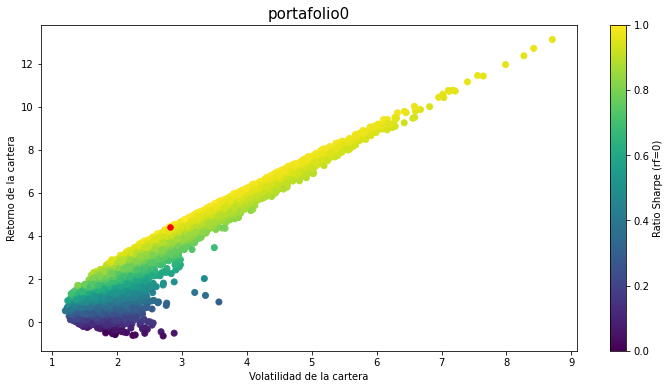

Pesos óptimos de la cartera:  [('BOGOTA', 39.68), ('BVC', 37.24), ('CELSIA', 19.919999999999998), ('CNEC', 0.0), ('GRUPOAVAL', 3.16)]
Retorno óptimo de la cartera:  677.4571
Volatilidad óptima de la cartera:  436.6774
Ratio Sharpe óptimo de la cartera:  1.5514


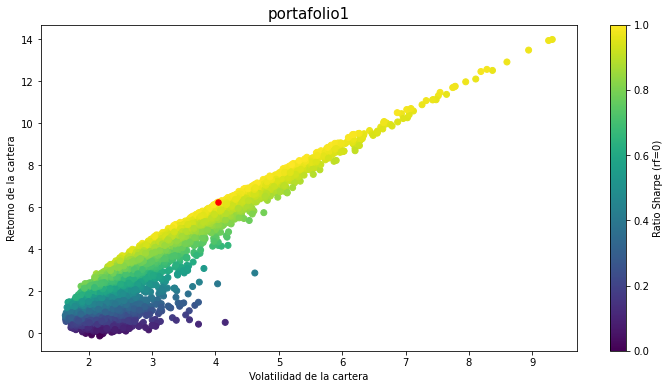

Pesos óptimos de la cartera:  [('BOGOTA', 42.42), ('BVC', 38.279999999999994), ('CELSIA', 19.259999999999998), ('CNEC', 0.0), ('NUTRESA', 0.03)]
Retorno óptimo de la cartera:  696.3556
Volatilidad óptima de la cartera:  449.1956
Ratio Sharpe óptimo de la cartera:  1.5502


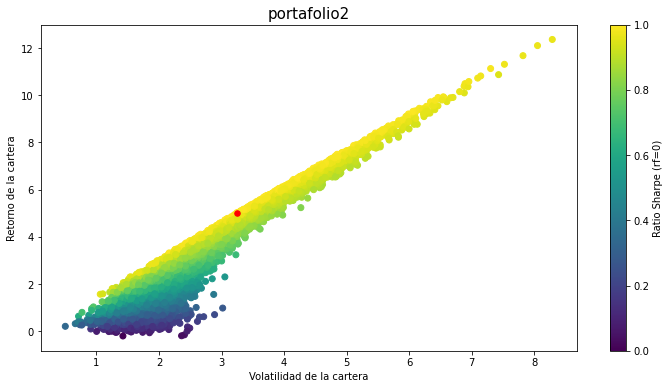

Pesos óptimos de la cartera:  [('BOGOTA', 42.4), ('BVC', 38.32), ('CELSIA', 19.28), ('CNEC', 0.0), ('PFAVAL', 0.0)]
Retorno óptimo de la cartera:  697.0359
Volatilidad óptima de la cartera:  449.6344
Ratio Sharpe óptimo de la cartera:  1.5502


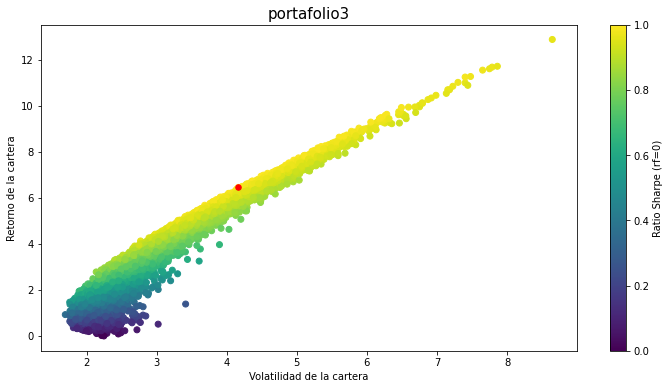

Pesos óptimos de la cartera:  [('BOGOTA', 25.080000000000002), ('BVC', 34.260000000000005), ('CELSIA', 27.439999999999998), ('CNEC', 0.0), ('PFCORFICOL', 13.22)]
Retorno óptimo de la cartera:  681.9201
Volatilidad óptima de la cartera:  397.5898
Ratio Sharpe óptimo de la cartera:  1.7151


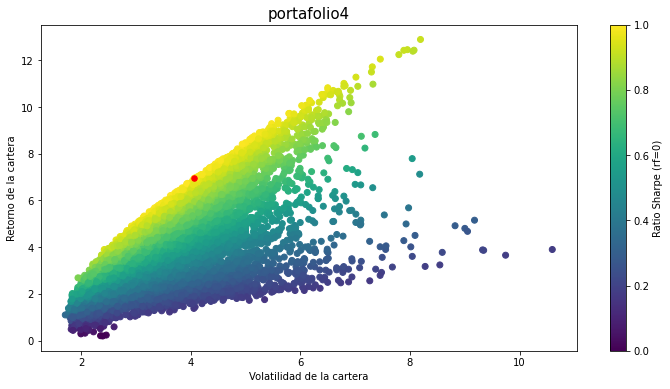

Pesos óptimos de la cartera:  [('BOGOTA', 42.43), ('BVC', 38.31), ('CELSIA', 19.27), ('CNEC', 0.0), ('PFDAVVNDA', 0.0)]
Retorno óptimo de la cartera:  696.8813
Volatilidad óptima de la cartera:  449.5348
Ratio Sharpe óptimo de la cartera:  1.5502


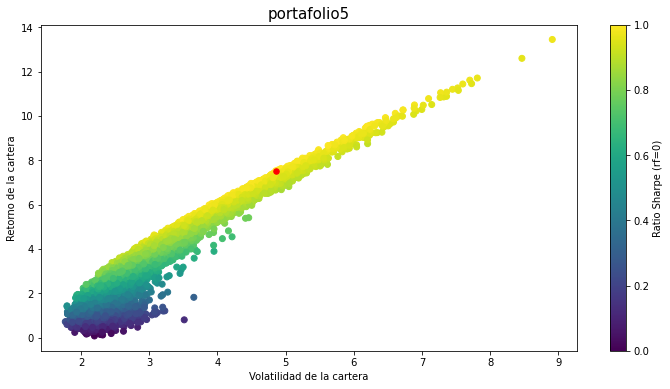

Pesos óptimos de la cartera:  [('BOGOTA', 42.230000000000004), ('BVC', 26.06), ('CELSIA', 15.770000000000001), ('CORFICOLCF', 15.6), ('GRUPOAVAL', 0.33999999999999997)]
Retorno óptimo de la cartera:  468.2048
Volatilidad óptima de la cartera:  296.3567
Ratio Sharpe óptimo de la cartera:  1.5799


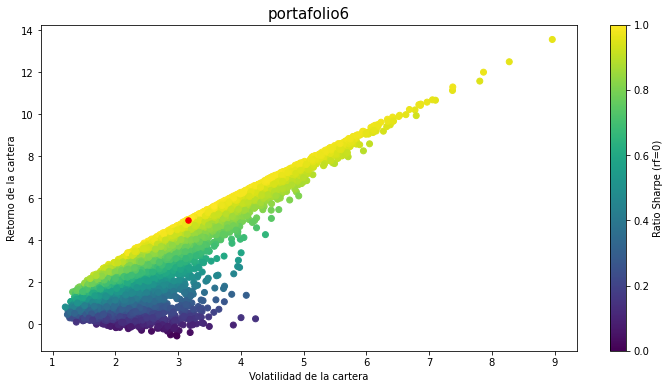

Pesos óptimos de la cartera:  [('BOGOTA', 35.870000000000005), ('BVC', 22.040000000000003), ('CELSIA', 13.209999999999999), ('CORFICOLCF', 13.270000000000001), ('NUTRESA', 15.61)]
Retorno óptimo de la cartera:  395.1836
Volatilidad óptima de la cartera:  250.1241
Ratio Sharpe óptimo de la cartera:  1.5799


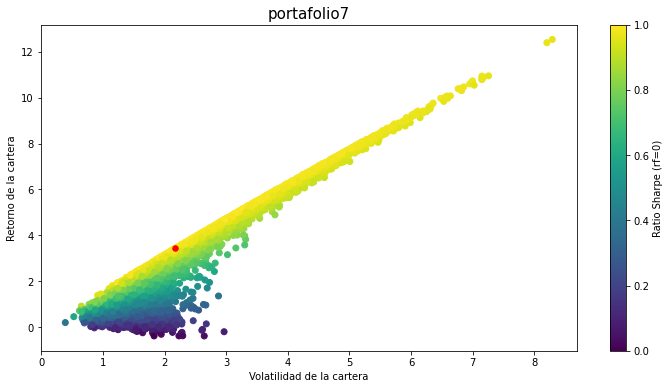

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from datetime import datetime
import json

import warnings
warnings.filterwarnings("ignore")

# assets = ['V','HD','JD']        
# fecha = datetime.datetime(2013, 1, 1)
# fecha_fin = datetime.datetime(2013, 1, 1)
# end = datetime.datetime(2016, 1, 27)
# data = pd.DataFrame()
# # for t in assets:
# data[t] = wb.DataReader('V', data_source='yahoo', start=fecha,end=fecha_fin)['Adj Close']

# log_returns = np.log(1+data.pct_change())

# import yfinance as yf

# from datetime import date, timedelta
# today = date.today()
# today
# end_date = today.strftime("%Y-%m-%d")
# end_date
# d1 = date.today() - timedelta(days=360*2) #for last 5 years
# d1
# start_date = d1.strftime("%Y-%m-%d")
# start_date
# assets = ['V','HD','JD']
# data = pd.DataFrame()
# for i in assets:      
#     data[i] = yf.download(tickers = i,
#                       start = start_date,
#                       end = end_date)['Adj Close']
    
# print(data.shape)

resultados_opt=[]

tiempo_1=datetime.now()

for j in range(len(combinaciones_acciones_prueba)):
    assets=list(combinaciones_acciones_prueba[j])
    log_returns = np.log(1+data_tesis_vf_v1[assets].pct_change())
    port_returns = []
    port_vols = []
    
    
    

    for i in range (10000):
        num_assets = len(assets)
        weights = np.random.random(num_assets)
        weights /= np.sum(weights) 
        port_ret = np.sum(log_returns.mean() * weights) * 90
        port_var = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*90, weights)))       
        port_returns.append(port_ret)
        port_vols.append(port_var)

    def portfolio_stats(weights, log_returns):
        port_ret = np.sum(log_returns.mean() * weights) * 90
        port_var = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 90, weights)))
        sharpe = port_ret/port_var    
        return {'Return': port_ret, 'Volatility': port_var, 'Sharpe': sharpe}

    def minimize_sharpe(weights, log_returns): 
        return -portfolio_stats(weights, log_returns)['Sharpe'] 

    port_returns = np.array(port_returns)
    port_vols = np.array(port_vols)
    sharpe = port_returns/port_vols

    max_sr_vol = port_vols[sharpe.argmax()]
    max_sr_ret = port_returns[sharpe.argmax()]

    constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
    bounds = tuple((0,1) for x in range(num_assets))
    initializer = num_assets * [1./num_assets,]

    optimal_sharpe = optimize.minimize(minimize_sharpe, initializer, method = 'SLSQP', args = (log_returns,) ,bounds = bounds, constraints = constraints)
    optimal_sharpe_weights = optimal_sharpe['x'].round(4)
    optimal_stats = portfolio_stats(optimal_sharpe_weights, log_returns)
    
    
    print("Pesos óptimos de la cartera: ", list(zip(assets, list(optimal_sharpe_weights*100))))
    print("Retorno óptimo de la cartera: ", round(optimal_stats['Return']*100,4))
    print("Volatilidad óptima de la cartera: ", round(optimal_stats['Volatility']*100,4))
    print("Ratio Sharpe óptimo de la cartera: ", round(optimal_stats['Sharpe'],4))
    
    path_portafolio='C:/Users/USUARIO/Downloads/lstm_with_pytorch_and_lightning_v1.0/lstm_with_pytorch_and_lightning/portafolio/'
    
    dictionary ={
    "pesos" : list(zip(assets, list(optimal_sharpe_weights*100))),
    "retorno" : round(optimal_stats['Return']*100,4),
    "volatilidad" : round(optimal_stats['Volatility']*100,4),
    "ratio_sharpe" : round(optimal_stats['Sharpe'],4)
        }
    
    with open(path_portafolio + "portafolio" +"_"+str(j) + ".json", "w") as outfile:
        json.dump(dictionary, outfile)
        
    path_graficos='C:/Users/USUARIO/Downloads/lstm_with_pytorch_and_lightning_v1.0/lstm_with_pytorch_and_lightning/graficos/'
        
    
    plt.figure(figsize = (12,6))
    plt.scatter(port_vols,port_returns,c = (port_returns/port_vols))
    plt.scatter(max_sr_vol, max_sr_ret,c='red', s=30)
    #plt.plot(port_vols, port_returns, linewidth=3, label='Efficient frontier')
    plt.colorbar(label = 'Ratio Sharpe (rf=0)')
    plt.xlabel('Volatilidad de la cartera')
    plt.ylabel('Retorno de la cartera')
    plt.title('portafolio'+str(j), fontsize = 15)
    plt.savefig(path_graficos + 'frontera_eficiente_'+ 'portafolio_' + str(j)+'.jpg',facecolor='white')
    plt.show()
    
   


    
tiempo_2=datetime.now()
print(tiempo_2-tiempo_1)

### Listando .json

In [313]:
import os

In [314]:
path_portafolio='C:/Users/USUARIO/Downloads/lstm_with_pytorch_and_lightning_v1.0/lstm_with_pytorch_and_lightning/portafolio/'
path_portafolio

'C:/Users/USUARIO/Downloads/lstm_with_pytorch_and_lightning_v1.0/lstm_with_pytorch_and_lightning/portafolio/'

In [315]:
contenido = os.listdir(path_portafolio)
print(contenido)

['portafolio_0.json', 'portafolio_1.json', 'portafolio_2.json', 'portafolio_3.json', 'portafolio_4.json', 'portafolio_5.json', 'portafolio_6.json', 'portafolio_7.json', 'portafolio_8.json', 'portafolio_9.json']


In [316]:
portafolios=[x for x in contenido if 'porta' in x]
portafolios

['portafolio_0.json',
 'portafolio_1.json',
 'portafolio_2.json',
 'portafolio_3.json',
 'portafolio_4.json',
 'portafolio_5.json',
 'portafolio_6.json',
 'portafolio_7.json',
 'portafolio_8.json',
 'portafolio_9.json']

In [317]:
portafolios[0][:-5]

'portafolio_0'

In [318]:
list_df=[]
for i in portafolios:
    print(i)
    df=pd.read_json(i)
    df['portafolio']=i[:-5]
    list_df.append(df)
list_df=pd.concat(list_df)

portafolio_0.json
portafolio_1.json
portafolio_2.json
portafolio_3.json
portafolio_4.json
portafolio_5.json
portafolio_6.json
portafolio_7.json
portafolio_8.json
portafolio_9.json


In [319]:
combinaciones_acciones_prueba

[('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'CORFICOLCF'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'GRUPOAVAL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'NUTRESA'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'PFAVAL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'PFCORFICOL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CNEC', 'PFDAVVNDA'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'GRUPOAVAL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'NUTRESA'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'PFAVAL'),
 ('BOGOTA', 'BVC', 'CELSIA', 'CORFICOLCF', 'PFCORFICOL')]

In [320]:
pd.Series(combinaciones_acciones_prueba)

0          (BOGOTA, BVC, CELSIA, CNEC, CORFICOLCF)
1           (BOGOTA, BVC, CELSIA, CNEC, GRUPOAVAL)
2             (BOGOTA, BVC, CELSIA, CNEC, NUTRESA)
3              (BOGOTA, BVC, CELSIA, CNEC, PFAVAL)
4          (BOGOTA, BVC, CELSIA, CNEC, PFCORFICOL)
5           (BOGOTA, BVC, CELSIA, CNEC, PFDAVVNDA)
6     (BOGOTA, BVC, CELSIA, CORFICOLCF, GRUPOAVAL)
7       (BOGOTA, BVC, CELSIA, CORFICOLCF, NUTRESA)
8        (BOGOTA, BVC, CELSIA, CORFICOLCF, PFAVAL)
9    (BOGOTA, BVC, CELSIA, CORFICOLCF, PFCORFICOL)
dtype: object

In [321]:
list_df

,pesos,retorno,volatilidad,ratio_sharpe,portafolio
0,"[BOGOTA, 42.57]",468.7419,296.7022,1.5798,portafolio_0
1,"[BVC, 26.090000000000003]",468.7419,296.7022,1.5798,portafolio_0
2,"[CELSIA, 15.65]",468.7419,296.7022,1.5798,portafolio_0
3,"[CNEC, 0.0]",468.7419,296.7022,1.5798,portafolio_0
4,"[CORFICOLCF, 15.690000000000001]",468.7419,296.7022,1.5798,portafolio_0
0,"[BOGOTA, 39.68]",677.4571,436.6774,1.5514,portafolio_1
1,"[BVC, 37.24]",677.4571,436.6774,1.5514,portafolio_1
2,"[CELSIA, 19.919999999999998]",677.4571,436.6774,1.5514,portafolio_1
3,"[CNEC, 0.0]",677.4571,436.6774,1.5514,portafolio_1
4,"[GRUPOAVAL, 3.16]",677.4571,436.6774,1.5514,portafolio_1


In [322]:
list_df['pesos']=list_df['pesos'].astype(str)

In [323]:
list_df[['accion', 'pesos']] = list_df['pesos'].str.split(',', 1, expand=True)

In [324]:
list_df.pesos=list_df.pesos.str.replace(']','')
list_df.accion=list_df.accion.str.replace("[","")
list_df['pesos']=list_df['pesos'].astype(float)
list_df['volatilidad']=list_df['volatilidad'].astype(float)
list_df['retorno']=list_df['retorno'].astype(float)
list_df['ratio_sharpe']=list_df['ratio_sharpe'].astype(float)

In [325]:
list_df

,pesos,retorno,volatilidad,ratio_sharpe,portafolio,accion
0,42.57,468.7419,296.7022,1.5798,portafolio_0,'BOGOTA'
1,26.09,468.7419,296.7022,1.5798,portafolio_0,'BVC'
2,15.65,468.7419,296.7022,1.5798,portafolio_0,'CELSIA'
3,0.00,468.7419,296.7022,1.5798,portafolio_0,'CNEC'
4,15.69,468.7419,296.7022,1.5798,portafolio_0,'CORFICOLCF'
0,39.68,677.4571,436.6774,1.5514,portafolio_1,'BOGOTA'
1,37.24,677.4571,436.6774,1.5514,portafolio_1,'BVC'
2,19.92,677.4571,436.6774,1.5514,portafolio_1,'CELSIA'
3,0.00,677.4571,436.6774,1.5514,portafolio_1,'CNEC'
4,3.16,677.4571,436.6774,1.5514,portafolio_1,'GRUPOAVAL'
